Finding intersection between electron number density and analytical photon energy...

Sampling temperatures:
Temperature (MeV) | Electron Density | Analytical Photon | Difference
-----------------------------------------------------------------
        0.0050 |    6.7948e-49 |       4.0587e-11 | 4.0587e-11
        0.0090 |    9.3576e-29 |       4.2763e-10 | 4.2763e-10
        0.0162 |    2.1263e-17 |       4.5056e-09 | 4.5056e-09
        0.0292 |    6.5350e-11 |       4.7471e-08 | 4.7406e-08
        0.0527 |    4.0767e-07 |       5.0016e-07 | 9.2488e-08
        0.0949 |    8.4355e-05 |       5.2697e-06 | 7.9086e-05
        0.1710 |    2.7513e-03 |       5.5522e-05 | 2.6957e-03
        0.3081 |    3.4026e-02 |       5.8499e-04 | 3.3441e-02
        0.5550 |    2.6561e-01 |       6.1635e-03 | 2.5945e-01
        1.0000 |    1.7181e+00 |       6.4939e-02 | 1.6531e+00

Intersection Results:
----------------------------------------
Temperature: 0.054188 MeV
Electron Density: 5.597671e-07
Anal

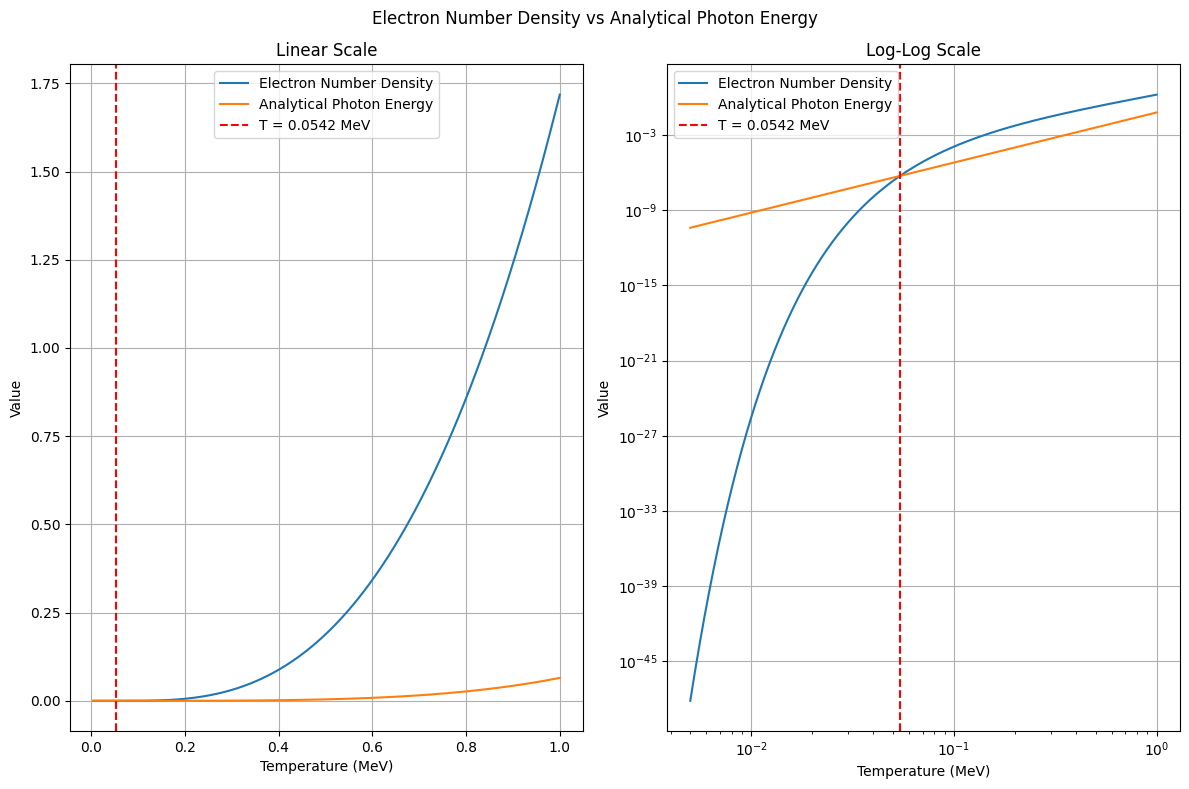

In [56]:
import numpy as np
from scipy import integrate
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

def integrand_number_density(p, T, m=0.511):
    """Integrand for electron number density."""
    return p**2 / (np.exp(np.sqrt(m**2 + p**2)/T)+1)

def analytical_photon_energy(T):
    """Analytical expression for photon energy density."""
    return (np.pi**4/1500) * T**4

def compute_integral_and_analytical(T):
    """
    Computes both the numerical integral and analytical expression for a given temperature T.
    """
    # Upper limit of integration (effectively infinity)
    upper_limit = 100 * T  # Adaptive upper limit based on temperature
    
    # Compute electron number density integral
    number_density, _ = integrate.quad(
        integrand_number_density, 
        0, 
        upper_limit, 
        args=(T, 0.511),
        limit=10000
    )
    
    # Compute analytical photon energy
    energy_density = analytical_photon_energy(T)
    
    return number_density, energy_density

def objective_function(T):
    """
    Function to minimize: absolute difference between integral and analytical expression
    """
    number_density, energy_density = compute_integral_and_analytical(T)
    return abs(number_density - energy_density)

def find_intersection(T_min=0.005, T_max=1.0):
    """
    Finds the temperature where the integral equals the analytical expression.
    """
    # Sample some points to understand the behavior
    T_sample = np.geomspace(T_min, T_max, 10)  # Using logarithmic spacing
    print("Sampling temperatures:")
    print("Temperature (MeV) | Electron Density | Analytical Photon | Difference")
    print("-" * 65)
    
    for T in T_sample:
        n, e = compute_integral_and_analytical(T)
        print(f"{T:14.4f} | {n:13.4e} | {e:16.4e} | {abs(n-e):10.4e}")
    
    # Find minimum using scipy's minimize_scalar
    result = minimize_scalar(
        objective_function,
        bounds=(T_min, T_max),
        method='bounded'
    )
    
    if not result.success:
        raise ValueError("Optimization failed to converge")
    
    # Verify the result
    n_final, e_final = compute_integral_and_analytical(result.x)
    print("\nIntersection Results:")
    print("-" * 40)
    print(f"Temperature: {result.x:.6f} MeV")
    print(f"Electron Density: {n_final:.6e}")
    print(f"Analytical Photon: {e_final:.6e}")
    print(f"Absolute difference: {abs(n_final - e_final):.2e}")
    print(f"Relative difference: {abs(n_final - e_final)/max(abs(n_final), abs(e_final)):.2e}")
    
    return result.x

def plot_results(T_intersection, T_range):
    """
    Plots both functions as a function of temperature.
    """
    temperatures = np.geomspace(T_range[0], T_range[1], 1000)  # More points for smoother plot
    number_densities = []
    energy_densities = []
    
    for T in temperatures:
        n, e = compute_integral_and_analytical(T)
        number_densities.append(n)
        energy_densities.append(e)
    
    plt.figure(figsize=(12, 8))
    
    # Plot on linear scale
    plt.subplot(121)
    plt.plot(temperatures, number_densities, label='Electron Number Density')
    plt.plot(temperatures, energy_densities, label='Analytical Photon Energy')
    plt.axvline(x=T_intersection, color='r', linestyle='--', 
                label=f'T = {T_intersection:.4f} MeV')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Value')
    plt.title('Linear Scale')
    plt.legend()
    plt.grid(True)
    
    # Plot on log-log scale
    plt.subplot(122)
    plt.loglog(temperatures, number_densities, label='Electron Number Density')
    plt.loglog(temperatures, energy_densities, label='Analytical Photon Energy')
    plt.axvline(x=T_intersection, color='r', linestyle='--', 
                label=f'T = {T_intersection:.4f} MeV')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Value')
    plt.title('Log-Log Scale')
    plt.legend()
    plt.grid(True)
    
    plt.suptitle('Electron Number Density vs Analytical Photon Energy', fontsize=12)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    T_range = (0.005, 1.0)  # Temperature range in MeV
    
    # Find intersection
    print("Finding intersection between electron number density and analytical photon energy...\n")
    T_intersection = find_intersection(T_range[0], T_range[1])
    
    # Plot results
    plot_results(T_intersection, T_range)